# Load necessary libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Function that can take in worldbank data csv and output two dataframes indexed by country and year

In [34]:
def get_dataframes(file_name):
    interested_columns = ['Indicator Name']+[str(x) for x in range(1960,2021)]
    df = pd.read_csv(file_name, delimiter=',', skiprows=[0,1,2,3])
    
    country_index_df = df[interested_columns]
    country_index_df.index = list(df['Country Name']) 
    
    years_index_df = country_index_df.transpose()
    
    return country_index_df, years_index_df
    

In [35]:
datafile = 'ADS1_DS2_csv.csv'

# Call the function and get the dataframes 

In [36]:
country_df, years_df = get_dataframes(datafile)

# unique indicators

In [37]:
country_df['Indicator Name'].unique()

array(['Urban population (% of total population)', 'Urban population',
       'Urban population growth (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Community health workers (per 1,000 people)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Primary completion rate, total (% of relevant age group)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'CPIA public sector management and institutions cluster average (1=low to 6=high)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Terrestrial and marine protected areas (% of total territorial area)',
       'Marine protected areas (% of territorial waters)',
       'Terrestrial protected 

# Select the indicators of interest

In [38]:
selected_indicators = ['CO2 emissions (metric tons per capita)', 'Population growth (annual %)', 'Electric power consumption (kWh per capita)', 'Methane emissions (kt of CO2 equivalent)'] 
print(selected_indicators)

['CO2 emissions (metric tons per capita)', 'Population growth (annual %)', 'Electric power consumption (kWh per capita)', 'Methane emissions (kt of CO2 equivalent)']


# Select the countries of interest

In [39]:
selected_countries = ['China', 'European Union', 'United States', 'India']
print(selected_countries)

['China', 'European Union', 'United States', 'India']


# Get the dataframe with selected countries and indicators

In [40]:
selected_df = country_df[country_df['Indicator Name'].isin(selected_indicators)].loc[selected_countries]

In [41]:
selected_df.head(5)

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
China,Population growth (annual %),NaN,-1.015528,0.820456,2.457647,2.320683,2.381368,2.787332,2.570698,2.610903,...,5.464576e-01,6.783455e-01,6.660730e-01,6.303264e-01,5.814561e-01,5.730509e-01,6.052450e-01,4.676721e-01,0.354741,0.225948
China,Methane emissions (kt of CO2 equivalent),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.106190e+06,1.151100e+06,1.178020e+06,1.206210e+06,1.237520e+06,1.242150e+06,1.239130e+06,1.238630e+06,NaN,NaN
China,CO2 emissions (metric tons per capita),1.170381,0.836047,0.661428,0.640002,0.625646,0.665524,0.710891,0.574162,0.605452,...,6.898148e+00,7.039788e+00,7.289017e+00,7.212791e+00,7.124223e+00,7.071898e+00,7.174948e+00,7.352263e+00,NaN,NaN
China,Electric power consumption (kWh per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.295785e+03,3.466020e+03,3.757185e+03,3.905318e+03,NaN,NaN,NaN,NaN,NaN,NaN
European Union,Population growth (annual %),NaN,0.866421,0.889468,0.913002,0.909571,0.860481,0.805935,0.765568,0.709251,...,-1.778864e-01,1.472382e-01,2.432129e-01,2.502333e-01,2.180200e-01,2.123456e-01,1.568200e-01,1.633329e-01,0.062971,0.135260


# modify the dataframe to be used for analysis

In [42]:
CIY_df= selected_df.rename_axis('Country Name').reset_index()
CIY_df.head(5)

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,China,Population growth (annual %),NaN,-1.015528,0.820456,2.457647,2.320683,2.381368,2.787332,2.570698,...,5.464576e-01,6.783455e-01,6.660730e-01,6.303264e-01,5.814561e-01,5.730509e-01,6.052450e-01,4.676721e-01,0.354741,0.225948
1,China,Methane emissions (kt of CO2 equivalent),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.106190e+06,1.151100e+06,1.178020e+06,1.206210e+06,1.237520e+06,1.242150e+06,1.239130e+06,1.238630e+06,NaN,NaN
2,China,CO2 emissions (metric tons per capita),1.170381,0.836047,0.661428,0.640002,0.625646,0.665524,0.710891,0.574162,...,6.898148e+00,7.039788e+00,7.289017e+00,7.212791e+00,7.124223e+00,7.071898e+00,7.174948e+00,7.352263e+00,NaN,NaN
3,China,Electric power consumption (kWh per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.295785e+03,3.466020e+03,3.757185e+03,3.905318e+03,NaN,NaN,NaN,NaN,NaN,NaN
4,European Union,Population growth (annual %),NaN,0.866421,0.889468,0.913002,0.909571,0.860481,0.805935,0.765568,...,-1.778864e-01,1.472382e-01,2.432129e-01,2.502333e-01,2.180200e-01,2.123456e-01,1.568200e-01,1.633329e-01,0.062971,0.135260


In [43]:
grouped = CIY_df.groupby(CIY_df['Indicator Name'])

In [44]:
def get_df_for_analysis(df__):
    df_ = df__[df__.columns[1:]].transpose().reset_index()
    df_.columns = ['year']+df__[df__.columns[0]].to_list()
    return df_

# get CO2 emission by country and year

In [45]:
CO2_df_ = grouped.get_group('CO2 emissions (metric tons per capita)').drop(['Indicator Name'], axis=1).dropna(axis='columns').reset_index(drop=True)
CO2_df = get_df_for_analysis(CO2_df_)
CO2_df.head(5)

,year,China,European Union,United States,India
0,1960,1.170381,4.729286,15.999779,0.267634
1,1961,0.836047,4.932846,15.681256,0.283704
2,1962,0.661428,5.299050,16.013937,0.305851
3,1963,0.640002,5.736879,16.482762,0.321795
4,1964,0.625646,6.011416,16.968119,0.308169


# Statistics on the CO2 emission by country shows that United states has higher mean CO2 emission than any other country. While the India's population is very very high compared to the US has low CO2 emissions

In [46]:
CO2_df.describe()

,China,European Union,United States,India
count,59.000000,59.000000,59.000000,59.000000
mean,2.813302,7.844813,18.859348,0.755075
std,2.184514,1.254632,1.959797,0.435335
min,0.574162,4.729286,14.805882,0.267634
25%,1.210253,6.999792,17.442961,0.392908
50%,2.038411,7.965993,19.238109,0.644102
75%,3.688606,8.914014,20.140362,0.938199
max,7.352263,10.132779,22.510582,1.799825


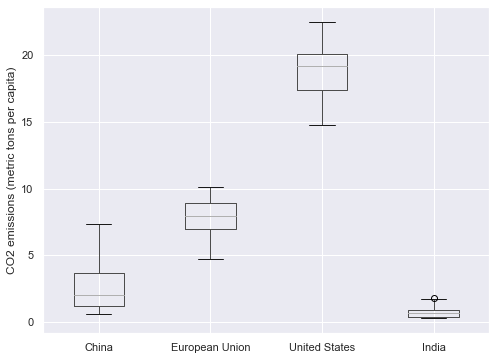

In [47]:
fig = plt.figure(figsize=(8,6))
CO2_df.boxplot(column=selected_countries)
plt.ylabel('CO2 emissions (metric tons per capita)');

# get population growth by country and year

In [48]:
POP_df_ = grouped.get_group('Population growth (annual %)').drop(['Indicator Name'], axis=1).dropna(axis='columns').reset_index(drop=True)
POP_df = get_df_for_analysis(POP_df_)
POP_df.head(5)

,year,China,European Union,United States,India
0,1961,-1.015528,0.866421,1.657730,1.998439
1,1962,0.820456,0.889468,1.537997,2.031905
2,1963,2.457647,0.913002,1.439165,2.056910
3,1964,2.320683,0.909571,1.389046,2.071544
4,1965,2.381368,0.860481,1.250172,2.080133


# Statistics on the pupulation growth by country. India has higher mean population growth than anyother country. China and EU have recorded negative growth rate.

In [49]:
POP_df.describe()

,China,European Union,United States,India
count,60.000000,60.000000,60.000000,60.000000
mean,1.248515,0.379135,1.001417,1.865630
std,0.786929,0.243536,0.246369,0.426172
min,-1.015528,-0.177886,0.350911,0.989414
25%,0.618457,0.216601,0.891904,1.571206
50%,1.187578,0.324839,0.961922,2.017542
75%,1.561405,0.537055,1.157023,2.230198
max,2.787332,0.913002,1.657730,2.331906


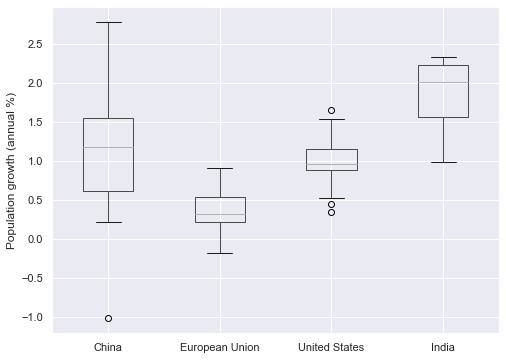

In [50]:
fig = plt.figure(figsize=(8,6))
POP_df.boxplot(column=selected_countries)
plt.ylabel('Population growth (annual %)');

# get Electricity consumption by country and year

In [51]:
EL_df_ = grouped.get_group('Electric power consumption (kWh per capita)').drop(['Indicator Name'], axis=1).dropna(axis='columns').reset_index(drop=True)
EL_df = get_df_for_analysis(EL_df_)
EL_df.head(5)

,year,China,European Union,United States,India
0,1971,151.989347,2763.649791,7517.304646,97.772718
1,1972,163.911929,2967.140067,8076.409269,100.305074
2,1973,175.933737,3185.020915,8573.194154,100.632154
3,1974,174.233354,3298.251167,8449.928456,103.992658
4,1975,199.039715,3308.574105,8522.394003,114.558928


# Statistics on the Electricty consumption by country. United states consumes 10 times higher electricity compared to china and 5 times compared to the EU and 20 times more compared to India. 

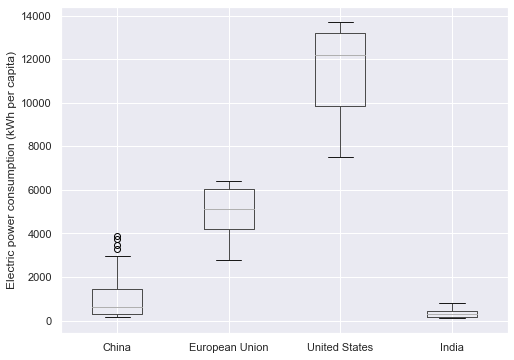

In [52]:
fig = plt.figure(figsize=(8,6))
EL_df.boxplot(column=selected_countries)
plt.ylabel('Electric power consumption (kWh per capita)');

# get methane emission by country and year

In [53]:
MET_df_ = grouped.get_group('Methane emissions (kt of CO2 equivalent)').drop(['Indicator Name'], axis=1).dropna(axis='columns').reset_index(drop=True)
MET_df = get_df_for_analysis(MET_df_)
MET_df.head(5)

,year,China,European Union,United States,India
0,1970,781088.0,559260.090,594255.0,398212.0
1,1971,813814.0,560377.328,579493.0,401434.0
2,1972,825771.0,565695.045,586231.0,401638.0
3,1973,826991.0,575997.859,589314.0,408086.0
4,1974,830833.0,587107.964,588197.0,411441.0


# Statistics on the methane emission by country shows that China has higher mean methane emission than any other country followed by US and India. EU on the otherhand has comparatively lower methane emissions compared to the other countries in the analysis

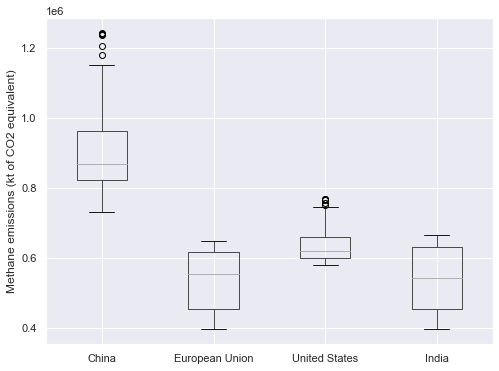

In [54]:
fig = plt.figure(figsize=(8,6))
MET_df.boxplot(column=selected_countries)
plt.ylabel('Methane emissions (kt of CO2 equivalent)');

# Trend analysis of the population growth by country. All the countries have recorded negative population growth in recent years.  

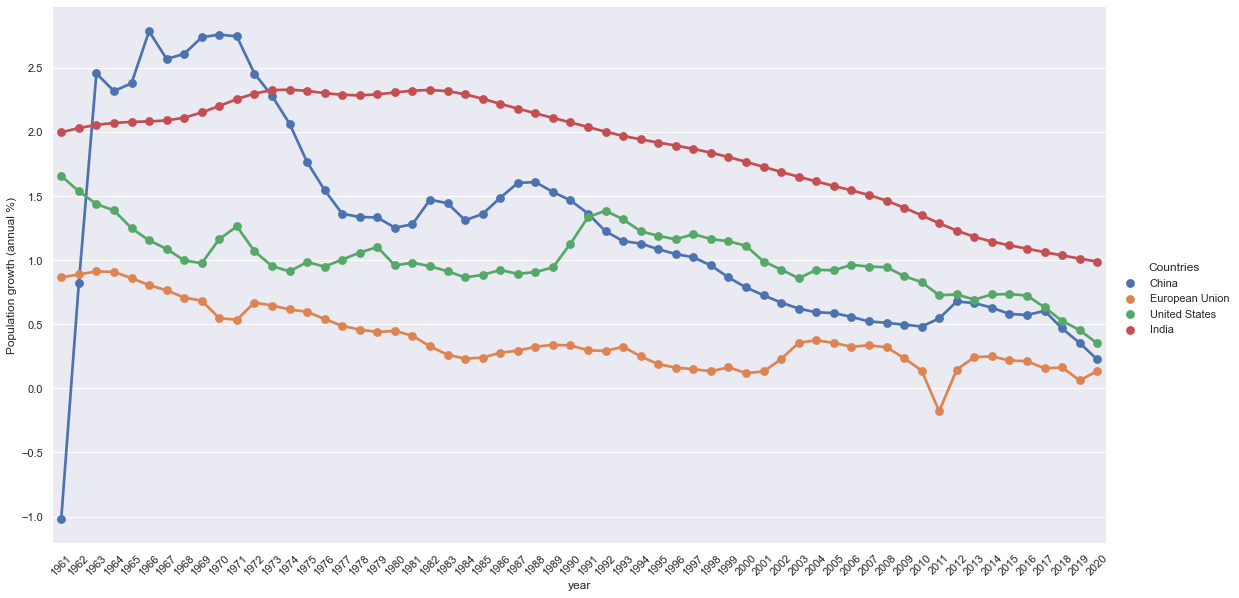

In [55]:
sns.set(font_scale=1)
countries = ['China' 'European Union', 'United States', 'India']
#plot multiple lines
dfm = POP_df.melt('year', var_name='Countries', value_name='Population growth (annual %)')
g = sns.catplot(x="year", y="Population growth (annual %)", hue='Countries', data=dfm, kind='point', height=8.27, aspect=15.7/8.27)
plt.xticks(rotation=45);
#modify individual font size of elements

# Trend analysis of the CO2 emission by country. US is trying hard to reduce its carbon emissions as there is a negative trend starting year 2000. While China CO2 emissions have surged from year 2000. On the other hand, EUs CO2 emissions have been going steadily down since 2005, while Indias have been in rise since 2005. Probably during these years the manufacturing and production industries have shifted from the west to the east.

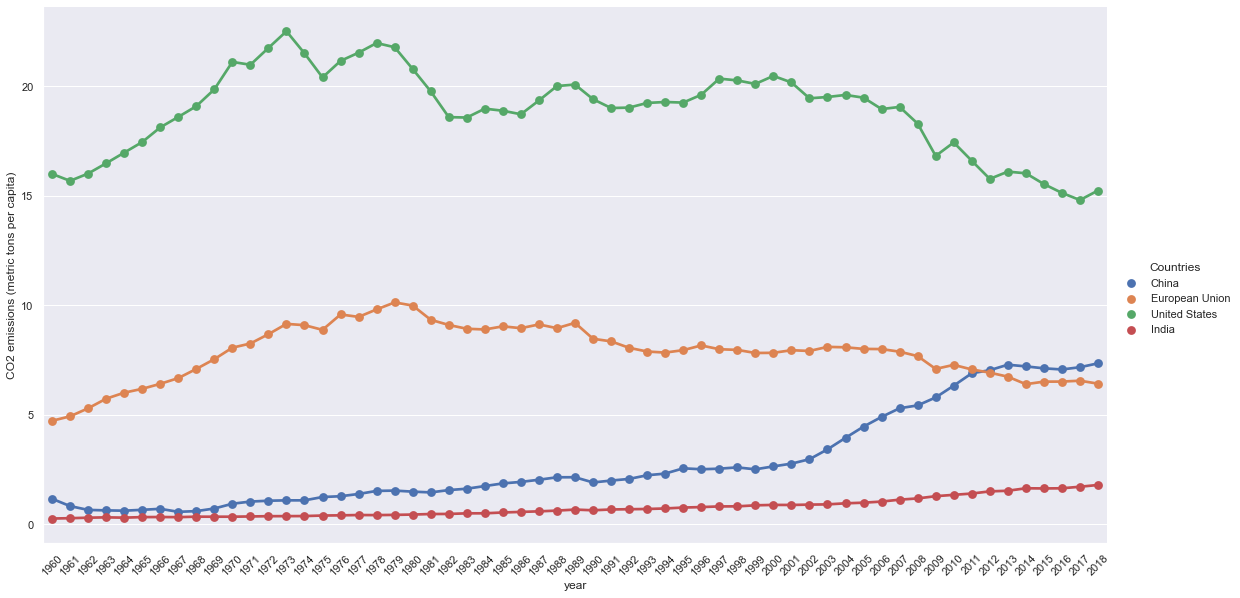

In [56]:
dfm = CO2_df.melt('year', var_name='Countries', value_name='CO2 emissions (metric tons per capita)')
g = sns.catplot(x="year", y="CO2 emissions (metric tons per capita)", hue='Countries', data=dfm, kind='point', height=8.27, aspect=15.7/8.27)
plt.xticks(rotation=45);
#modify individual font size of elements


# Trend analysis of the Electricty consumption by country. All the countries have recorded growing need for electricity in recent years. US is controlling its use since early 2000s. China's electricity consumption surged since year 2000s. This is correlated with the CO2 emission data as well, as the china's CO2 emissions raised since 2000s and US have fallen down.  

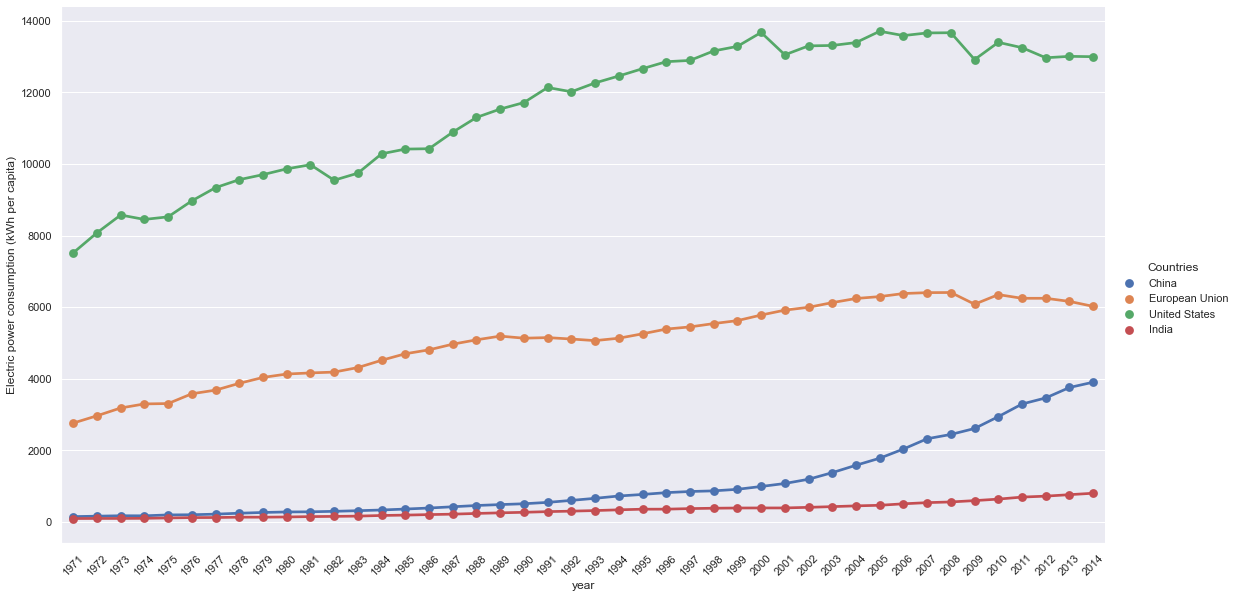

In [57]:
dfm = EL_df.melt('year', var_name='Countries', value_name='Electric power consumption (kWh per capita)')
g = sns.catplot(x="year", y="Electric power consumption (kWh per capita)", hue='Countries', data=dfm, kind='point', height=8.27, aspect=15.7/8.27)
plt.xticks(rotation=45);
#modify individual font size of elements

# Trend analysis of the Methane emissions by country. China's methane emissions surged since the early 1990s causing too much polution on the earth. Interestingly US methane emissions have fallen since the same year.  Europes methane emissions have falling since 1985 and the Indian emissions have been constantly rising since the 1980s. This is much similar to the CO2 emissions compared between the countries.

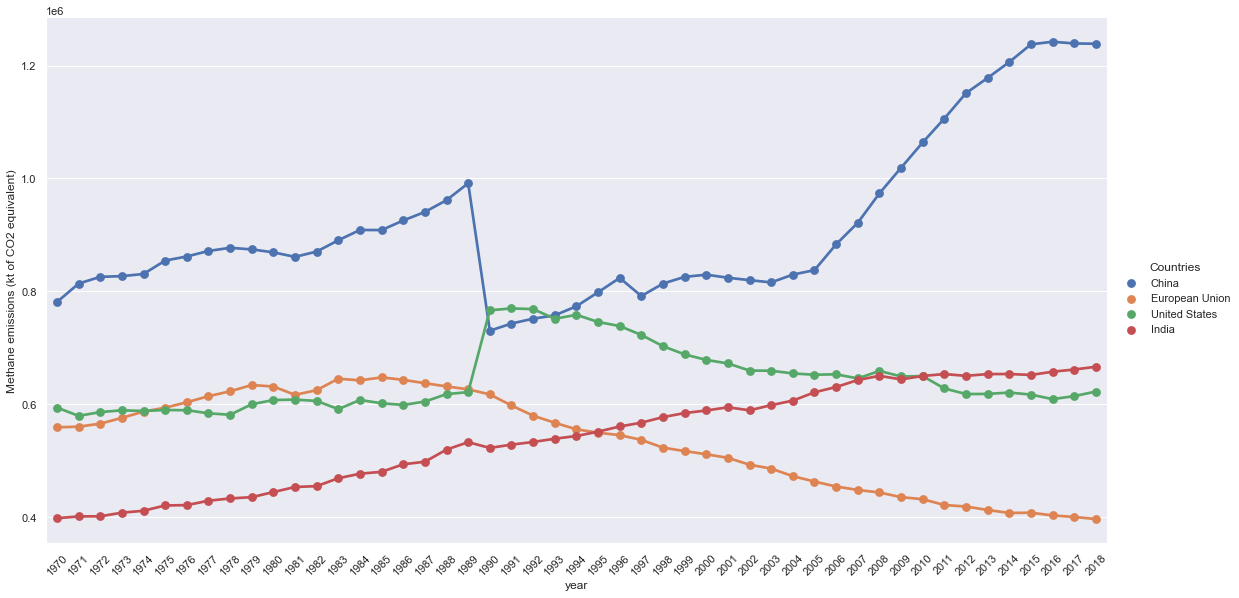

In [58]:
dfm = MET_df.melt('year', var_name='Countries', value_name='Methane emissions (kt of CO2 equivalent)')
g = sns.catplot(x="year", y="Methane emissions (kt of CO2 equivalent)", hue='Countries', data=dfm, kind='point', height=8.27, aspect=15.7/8.27)
plt.xticks(rotation=45);
#modify individual font size of elements


# Correlation Analysis of Population growth and electricity consumption. All the countries have recorded negative population growth in recent years and at the same time growing need for electricity. This is reflected with the negative correlation results. EU has the higher correlation between the growing population and electricty needs, followed by India.

In [59]:
POP_df.corrwith(EL_df).reset_index()

,index,0
0,China,-0.563719
1,European Union,-0.948162
2,United States,-0.374820
3,India,-0.751192


# Correlation Analysis of Population growth and methane emissions. All the countries have recorded negative population growth in recent years however, India and China have been emitting higher methane. This is reflected in the negative correlation. EU has positive correlation 

In [60]:
POP_df.corrwith(MET_df).reset_index()

,index,0
0,China,-0.438063
1,European Union,0.606308
2,United States,-0.325024
3,India,-0.701061


# Correlation Analysis of Population growth and methane emissions. All the countries have recorded negative population growth in recent years however, India and China have been emitting higher CO2. This is reflected in the negative correlation and their score is higher compared to US ans EU. US has positive correlation. India has higher correlation about -95% followed by china at -66%

In [61]:
POP_df.corrwith(CO2_df).reset_index()

,index,0
0,China,-0.662987
1,European Union,-0.297756
2,United States,0.195557
3,India,-0.955260


# Correlation Analysis of electricity and methane emissions. All the countries have recorded positive growth in usage of electricity in recent years. However, India and China have been emitting higher methane emissions. EU has negative correlation, meaning lower methane emissions and higher usage of electricity. EU is using cleaner ways to generate electricty. India has higher correlation about 95% ollowed by china at 69% and US at 63%. India probably using coal and other non renewable sources to produce electricty.

In [62]:
MET_df.corrwith(EL_df).reset_index()

,index,0
0,China,0.697878
1,European Union,-0.690612
2,United States,0.639503
3,India,0.957685


# Correlation Analysis of CO2 emissions and methane emissions. India has a very strong correlation between CO2 and methane emissions followed by China. US and EU have very low correlation.

In [63]:
MET_df.corrwith(CO2_df).reset_index()

,index,0
0,China,0.783194
1,European Union,0.127794
2,United States,0.071691
3,India,0.947955


# Correlation Analysis of electricity and CO2 emissions. All the countries have recorded positive growth in usage of electricity in recent years. However, US and EU have decreasing CO2 emissions recoreded while India and China have been emitting higher CO2 emissions. US is using cleaner ways to generate electricty. India has higher correlation about 98% followed by china at 90% and EU at 58%. India and China have very strong correlation between CO2 emissions and Electricty consumption.

In [64]:
EL_df.corrwith(CO2_df).reset_index()

,index,0
0,China,0.903997
1,European Union,0.584576
2,United States,0.376417
3,India,0.981831
